# Arnoldi vs Power Iteration

In [3]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as pt

ImportError: No module named 'matplotlib'

Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [4]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...50
n = 50
eigvals = np.linspace(1., n, n)
eigvecs = np.random.randn(n, n)
#To work with symmetric matrix, orthogonalize eigvecs
eigvecs, R = la.qr(eigvecs)

print(eigvals)

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(la.eig(A)[0])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.]
[ 50.   1.  49.  48.  47.   2.  46.  45.  44.   3.   4.  43.   5.   6.   7.
   8.  42.   9.  41.  10.  40.  39.  38.  37.  11.  12.  36.  13.  14.  35.
  34.  15.  16.  33.  32.  17.  18.  31.  30.  29.  19.  28.  20.  21.  27.
  22.  26.  25.  24.  23.]


## Initialization

Set up $Q$ and $H$:

In [5]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

Pick a starting vector, normalize it

In [6]:
x0 = np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:, k] = x0.copy()


Make a list to save arrays of Ritz values:

In [7]:
ritz_values = []
ritz_max = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

Run this cell in-place (Ctrl-Enter) until H is filled.

In [8]:
print(k)

u = A @ Q[:, k]

# Carry out Gram-Schmidt on u against Q
# to do Lanczos change range start to k-1
for j in range(0,k+1):
    qj = Q[:, j]
    H[j,k] = qj @ u
    u = u - H[j,k]*qj

if k+1 < n:
    H[k+1, k] = la.norm(u)
    Q[:, k+1] = u/H[k+1, k]

k += 1

pt.spy(H)


if k>1:
    D = la.eig(H)[0]
    max_ritz = D[np.argmax(np.abs(D))]
    ritz_vals = np.zeros(k)
    for i in range(k):
        ritz_vals[i] = D[np.argmax(np.abs(D))]
        D[np.argmax(np.abs(D))] = 0
    ritz_max.append(max_ritz)
    ritz_values.append(ritz_vals)

0


NameError: name 'pt' is not defined

Check that $Q^T A Q =H$:

In [9]:
la.norm(Q[:,:k-1].T @ A @ Q[:,:k-1] - H[:k-1,:k-1])/ la.norm(A)

0.0

Check that $AQ-QH$ is fairly small

In [10]:
la.norm(A @ Q[:,:k-1] - Q[:,:k-1]@H[:k-1,:k-1])/ la.norm(A)

0.0

Check that Q is orthogonal:

In [11]:
la.norm((Q.T.conj() @ Q)[:k-1,:k-1] - np.eye(k-1))

0.0

## Compare Max Ritz Value to Power Iteration

In [12]:
#true largest eigenvalue is 50
r = 0
x = A @ x0.copy()
x = x / la.norm(x)
rs = []
for i in range(k-1):
    y = A @ x
    r = x @ y
    x = y / la.norm(y)
    rs.append(r)
print(r,max_ritz)
pt.plot(rs, "x")
pt.plot(ritz_max, "o")

NameError: name 'max_ritz' is not defined

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

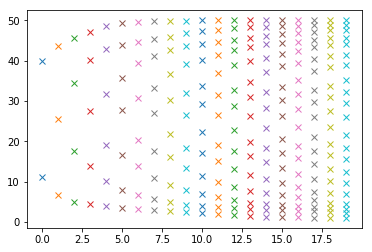

In [373]:
for i, rv in enumerate(ritz_values):
    pt.plot([i] * len(rv), rv, "x")